<a href="https://colab.research.google.com/github/MustofAhmed41/Exercise-Pattern-Prediction/blob/master/PR_Checkpoint2_Feature%20Selection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [5]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


## Loading Data

In [57]:
#df = pd.read_excel('pml-training.xlsx', index_col=False).drop('Row Number', axis=1).reset_index(drop=True)
load = pd.read_excel('exercise_full_dataset.xlsx').reset_index(drop=True)

In [141]:
df = load.copy()

In [142]:
print('Column Name', '  No of Missing Values')
for i in zip(df.columns, df.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
cvtd_timestamp 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 38435
kurtosis_picth_belt 		 38475
kurtosis_yaw_belt 		 39242
skewness_roll_belt 		 38434
skewness_roll_belt.1 		 38475
skewness_yaw_belt 		 39242
max_roll_belt 		 38403
max_picth_belt 		 38403
max_yaw_belt 		 38435
min_roll_belt 		 38403
min_pitch_belt 		 38403
min_yaw_belt 		 38435
amplitude_roll_belt 		 38403
amplitude_pitch_belt 		 38403
amplitude_yaw_belt 		 38435
var_total_accel_belt 		 38403
avg_roll_belt 		 38402
stddev_roll_belt 		 38403
var_roll_belt 		 38403
avg_pitch_belt 		 38403
stddev_pitch_belt 		 38403
var_pitch_belt 		 38403
avg_yaw_belt 		 38403
stddev_yaw_belt 		 38403
var_yaw_belt 		 38403
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_

In [143]:
df.head(3)

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1.322490e+09,34670.0,28/11/2011 14:15,no,1.0,3.70,41.6,-82.8,3.0,...,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,eurico,1.322490e+09,62641.0,28/11/2011 14:15,no,1.0,3.66,42.8,-82.5,2.0,...,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,eurico,1.322490e+09,70653.0,28/11/2011 14:15,no,1.0,3.58,43.7,-82.3,1.0,...,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39242 entries, 0 to 39241
Columns: 159 entries, user_name to classe
dtypes: float64(155), object(4)
memory usage: 47.6+ MB


In [145]:
df.describe()

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,3.924200e+04,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,807.000000,767.000000,0.0,...,839.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000
mean,1.322827e+09,500708.627465,432.322282,64.928120,0.423624,-10.827983,11.378982,-0.181088,4.533324,NaN,...,4702.779079,0.146381,0.095838,0.147643,-63.954814,162.981005,-55.494751,-316.640326,379.762296,395.010309
std,2.040334e+05,288682.935235,247.966725,62.672987,22.400539,94.982455,7.732219,3.739289,11.328069,NaN,...,7224.874200,1.827178,3.735124,1.337704,180.940999,199.580505,137.692832,345.893844,507.055260,368.098954
min,1.322490e+09,280.000000,1.000000,-28.900000,-56.200000,-180.000000,0.000000,-3.333333,-2.210526,NaN,...,0.000000,-339.000000,-7.030000,-52.000000,-498.000000,-690.000000,-458.000000,-1280.000000,-906.000000,-973.000000
25%,1.322673e+09,252299.500000,222.000000,1.100000,1.830000,-88.200000,3.000000,-1.346611,-1.079763,NaN,...,0.251195,-0.220000,-1.450000,-0.180000,-181.000000,53.000000,-181.000000,-620.000000,8.000000,200.000000
50%,1.322833e+09,498781.500000,428.000000,114.000000,5.320000,-11.900000,17.000000,-0.907946,-0.021887,NaN,...,606.510220,0.050000,0.030000,0.080000,-58.000000,200.000000,-40.500000,-385.000000,588.000000,512.000000
75%,1.323084e+09,752287.750000,647.000000,123.000000,15.500000,12.500000,18.000000,-0.282445,4.148419,NaN,...,7648.713645,0.560000,1.650000,0.490000,74.000000,312.000000,25.000000,-77.000000,736.000000,652.000000
max,1.323095e+09,999091.000000,864.000000,162.000000,60.300000,180.000000,30.000000,50.979819,71.000000,NaN,...,39009.333330,4.770000,516.000000,231.000000,479.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [146]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.heatmap(df.corr())

Data set is imbalanced

In [147]:
df.classe.value_counts()

A    11159
B     7593
E     7214
C     6844
D     6432
Name: classe, dtype: int64

In [148]:
len(df.num_window.value_counts())

861

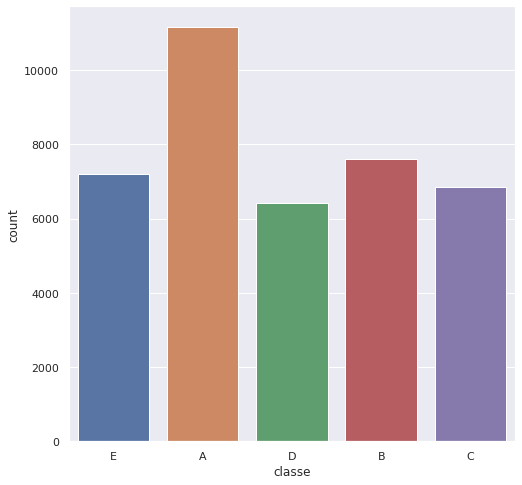

In [149]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="classe", data=df)

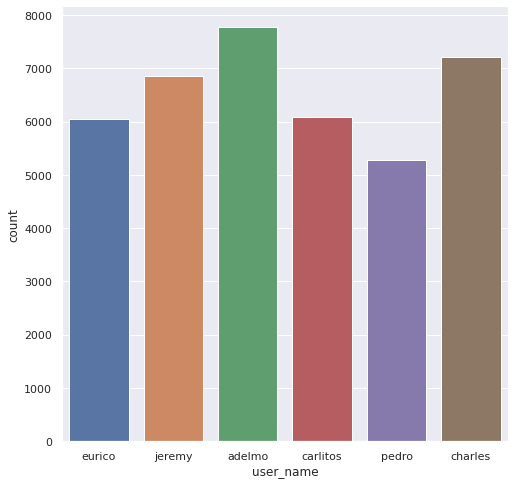

In [150]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="user_name", data=df)

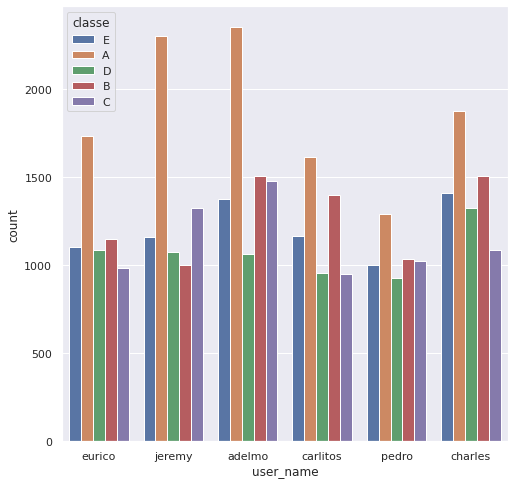

In [151]:
sns.set(rc={'figure.figsize':(8,8)})

sns.countplot(x="user_name", hue='classe', data=df)

## Extracting Time Column


In [152]:
df.rename(columns={'skewness_roll_belt.1':'skewness_pitch_belt'}, inplace=True)

In [153]:
df.drop('cvtd_timestamp', axis = 1, inplace=True)

In [154]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

float64
float64


In [155]:
df['raw_timestamp_part_1'] = df['raw_timestamp_part_1'].astype(str)
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].astype(str)

In [156]:
def concatenate_zero(val):
  if len(val) <6:
    return val + '0'
  else:
    return val

In [157]:
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].apply(concatenate_zero)

In [158]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

object
object


In [159]:
df['raw_timestamp_part_2'].head(10)

0     34670.0
1     62641.0
2     70653.0
3     82654.0
4     90637.0
5    170626.0
6    190665.0
7    242723.0
8    267551.0
9    274689.0
Name: raw_timestamp_part_2, dtype: object

In [160]:
df["Converted Time"]= df["raw_timestamp_part_1"].str.cat(df['raw_timestamp_part_2'])

In [161]:
df['Converted Time'].head(10)

0     1322489729.034670.0
1     1322489729.062641.0
2     1322489729.070653.0
3     1322489729.082654.0
4     1322489729.090637.0
5    1322489729.0170626.0
6    1322489729.0190665.0
7    1322489729.0242723.0
8    1322489729.0267551.0
9    1322489729.0274689.0
Name: Converted Time, dtype: object

In [165]:
import datetime

def convert_unix_epoch(epoch_time):
    epoch_time = str(epoch_time)
    epoch_time = epoch_time[:len(epoch_time)-3]
    epoch_time = int(float(epoch_time))
    dt = datetime.datetime.fromtimestamp(epoch_time/1000000)
    return dt.strftime("%Y-%m-%d %H:%M:%S.%f %p")+'';

In [166]:
convert_unix_epoch(str(1322489729170626))

'1970-01-16 07:21:29.729170 AM'

In [167]:
df['Converted Time'] = df['Converted Time'].apply(convert_unix_epoch)

In [168]:
df['Converted Time'].iloc[80:100]

80    1970-01-01 00:22:02.489730 AM
81    1970-01-01 00:22:02.489730 AM
82    1970-01-01 00:22:02.489730 AM
83    1970-01-01 00:22:02.489730 AM
84    1970-01-01 00:22:02.489730 AM
85    1970-01-01 00:22:02.489730 AM
86    1970-01-01 00:22:02.489730 AM
87    1970-01-01 00:22:02.489730 AM
88    1970-01-01 00:22:02.673166 AM
89    1970-01-01 00:22:02.673166 AM
90    1970-01-01 00:22:02.673166 AM
91    1970-01-01 00:22:02.673166 AM
92    1970-01-01 00:22:02.832938 AM
93    1970-01-01 00:22:02.832938 AM
94    1970-01-01 00:22:02.832938 AM
95    1970-01-01 00:22:02.832938 AM
96    1970-01-01 00:22:02.832938 AM
97    1970-01-01 00:22:02.832938 AM
98    1970-01-01 00:22:02.832938 AM
99    1970-01-01 00:22:02.832938 AM
Name: Converted Time, dtype: object

In [171]:
def extract_miliseconds(val):
    val = str(val)
    return val[17:26]

In [172]:
df['Converted Seconds'] = df['Converted Time'].apply(extract_miliseconds)

In [173]:
df['Converted Seconds'].iloc[10:20]

10    02.489729 A
11    02.489729 A
12    02.489729 A
13    02.489729 A
14    02.489729 A
15    02.489729 A
16    02.489729 A
17    02.489729 A
18    02.489729 A
19    02.489729 A
Name: Converted Seconds, dtype: object

In [174]:
df['Converted Seconds'].iloc[90:100]

90    02.673166 A
91    02.673166 A
92    02.832938 A
93    02.832938 A
94    02.832938 A
95    02.832938 A
96    02.832938 A
97    02.832938 A
98    02.832938 A
99    02.832938 A
Name: Converted Seconds, dtype: object

In [108]:
df1 = df.copy()

In [109]:
df1['Converted Seconds']

0        02.489729
1        02.489729
2        02.489729
3        02.489729
4        02.489729
           ...    
39237    02.832937
39238    02.832937
39239    02.832937
39240    02.832937
39241    02.832937
Name: Converted Seconds, Length: 39242, dtype: object

## Filling Empty Values

In [110]:
df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time',
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns

Index(['kurtosis_roll_belt', 'kurtosis_picth_belt', 'skewness_roll_belt',
       'max_roll_belt', 'max_picth_belt', 'max_yaw_belt', 'min_roll_belt',
       'min_pitch_belt', 'min_yaw_belt', 'amplitude_roll_belt',
       'amplitude_pitch_belt', 'amplitude_yaw_belt', 'var_total_accel_belt',
       'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt',
       'stddev_yaw_belt', 'var_yaw_belt', 'var_accel_arm', 'avg_roll_arm',
       'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm',
       'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm',
       'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm',
       'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm',
       'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'min_roll_arm',
       'min_pitch_arm', 'min_yaw_arm', 'amplitude_roll_arm',
       'amplitude_pitch_arm', 'amplitude_yaw_arm', 'kurtosis_roll_dumbb

In [111]:
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

Number of Empty Values :  38435
Number of Empty Values :  0


In [112]:
for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ]['kurtosis_roll_belt']
    for j in val:
      df1.loc[ df1['num_window'] == i , 'kurtosis_roll_belt' ] = j

In [113]:
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

Number of Empty Values :  1706
Number of Empty Values :  0


In [114]:
for j in df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time', 
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns:
  for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ][j]
    for k in val:
      df1.loc[(df1['num_window'] == i), j] = k


In [115]:
df2 = df1.copy()

In [116]:
print('Column Name', '  No of Missing Values')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 1706
kurtosis_picth_belt 		 3556
kurtosis_yaw_belt 		 39242
skewness_roll_belt 		 1703
skewness_pitch_belt 		 38475
skewness_yaw_belt 		 39242
max_roll_belt 		 432
max_picth_belt 		 432
max_yaw_belt 		 1706
min_roll_belt 		 432
min_pitch_belt 		 432
min_yaw_belt 		 1706
amplitude_roll_belt 		 432
amplitude_pitch_belt 		 432
amplitude_yaw_belt 		 1706
var_total_accel_belt 		 432
avg_roll_belt 		 432
stddev_roll_belt 		 432
var_roll_belt 		 432
avg_pitch_belt 		 432
stddev_pitch_belt 		 432
var_pitch_belt 		 432
avg_yaw_belt 		 432
stddev_yaw_belt 		 432
var_yaw_belt 		 432
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_

In [117]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt
978,NaN,24.0,0.85
979,NaN,24.0,0.87
980,NaN,24.0,0.85
981,NaN,24.0,0.85
982,NaN,24.0,0.86
...,...,...,...
36582,NaN,806.0,0.99
36583,NaN,806.0,1.03
38708,NaN,852.0,1.21
38709,NaN,852.0,1.22


In [118]:
for i in df2[df2['max_roll_belt'].isna()]['num_window'].unique():
  max_val = df2[(df2['num_window'] == i)]['roll_belt'].max()
  df2.loc[ (df2['num_window'] == i) ,'max_roll_belt' ] = max_val

In [119]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt


In [120]:
empty_max_cols = ['max_roll_belt', 'max_picth_belt',  'max_yaw_belt', 
            'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 
            'max_roll_dumbbell', 'max_picth_dumbbell', 'max_yaw_dumbbell',
            'max_roll_forearm', 'max_picth_forearm', 'max_yaw_forearm'
            ]

empty_min_cols = ['min_roll_belt', 'min_pitch_belt',  'min_yaw_belt', 
            'min_roll_arm', 'min_pitch_arm', 'min_yaw_arm', 
            'min_roll_dumbbell', 'min_pitch_dumbbell', 'min_yaw_dumbbell',
            'min_roll_forearm', 'min_pitch_forearm', 'min_yaw_forearm'
            ]

empty_avg_cols = ['avg_roll_belt', 'avg_pitch_belt',  'avg_yaw_belt', 
            'avg_roll_arm', 'avg_pitch_arm', 'avg_yaw_arm', 
            'avg_roll_dumbbell', 'avg_pitch_dumbbell', 'avg_yaw_dumbbell',
            'avg_roll_forearm', 'avg_pitch_forearm', 'avg_yaw_forearm'
            ]

empty_var_cols = ['var_roll_belt', 'var_pitch_belt',  'var_yaw_belt', 
            'var_roll_arm', 'var_pitch_arm', 'var_yaw_arm', 
            'var_roll_dumbbell', 'var_pitch_dumbbell', 'var_yaw_dumbbell',
            'var_roll_forearm', 'var_pitch_forearm', 'var_yaw_forearm'
            ]

empty_std_cols = ['stddev_roll_belt', 'stddev_pitch_belt',  'stddev_yaw_belt', 
            'stddev_roll_arm', 'stddev_pitch_arm', 'stddev_yaw_arm', 
            'stddev_roll_dumbbell', 'stddev_pitch_dumbbell', 'stddev_yaw_dumbbell',
            'stddev_roll_forearm', 'stddev_pitch_forearm', 'stddev_yaw_forearm'
            ]

empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_pitch_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_pitch_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_pitch_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_pitch_forearm', 'kurtosis_yaw_forearm'
            ]   


empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_picth_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_picth_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm'
            ]

empty_skew_cols = ['skewness_roll_belt', 'skewness_pitch_belt',  'skewness_yaw_belt', 
            'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm', 
            'skewness_roll_dumbbell', 'skewness_pitch_dumbbell', 'skewness_yaw_dumbbell',
            'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm'
            ]

empty_amplitude_cols = ['amplitude_roll_belt', 'amplitude_pitch_belt',  'amplitude_yaw_belt', 
            'amplitude_roll_arm', 'amplitude_pitch_arm', 'amplitude_yaw_arm', 
            'amplitude_roll_dumbbell', 'amplitude_pitch_dumbbell', 'amplitude_yaw_dumbbell',
            'amplitude_roll_forearm', 'amplitude_pitch_forearm', 'amplitude_yaw_forearm'
            ]   

empty_acceleration_cols = ['var_total_accel_belt', 'var_accel_arm',  'var_accel_dumbbell',
                           'var_accel_forearm']

attributes = [
              'roll_belt','pitch_belt','yaw_belt',
              'roll_arm', 'pitch_arm', 'yaw_arm',
              'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
              'roll_forearm', 'pitch_forearm', 'yaw_forearm',
              ]

attributes2 = ['total_accel_belt',  'total_accel_arm', 'total_accel_dumbbell', 
               'total_accel_forearm']

In [121]:
for j in zip(empty_max_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    max_val = df2[(df2['num_window'] == i)][j[1]].max()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = max_val

In [122]:
for j in zip(empty_min_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    min_val = df2[(df2['num_window'] == i)][j[1]].min()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = min_val

In [123]:
for j in zip(empty_avg_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    mean_val = df2[(df2['num_window'] == i)][j[1]].mean()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = mean_val

In [124]:
for j in zip(empty_var_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    var_val = df2[(df2['num_window'] == i)][j[1]].var()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = var_val

In [125]:
for j in zip(empty_std_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].std()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [126]:
for j in zip(empty_kurtosis_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].kurtosis()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [127]:
for j in zip(empty_skew_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].skew()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [128]:
for j in zip(empty_amplitude_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val1 = df2[(df2['num_window'] == i)][j[1]].max()
    val2 = df2[(df2['num_window'] == i)][j[1]].min()
    val = abs(val1 - val2)
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = val

In [129]:
for j in zip(empty_acceleration_cols, attributes2):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    val = df2[(df2['num_window'] == i)][j[1]].var()    
    df2.loc[(df2['num_window'] == i),j[0]] = val

In [130]:
print(len(df2))

39242


In [131]:
print('Column Name', '  No of Missing Values\n')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values

user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 12
kurtosis_picth_belt 		 12
kurtosis_yaw_belt 		 12
skewness_roll_belt 		 6
skewness_pitch_belt 		 6
skewness_yaw_belt 		 6
max_roll_belt 		 0
max_picth_belt 		 0
max_yaw_belt 		 0
min_roll_belt 		 0
min_pitch_belt 		 0
min_yaw_belt 		 0
amplitude_roll_belt 		 0
amplitude_pitch_belt 		 0
amplitude_yaw_belt 		 0
var_total_accel_belt 		 2
avg_roll_belt 		 0
stddev_roll_belt 		 2
var_roll_belt 		 2
avg_pitch_belt 		 0
stddev_pitch_belt 		 2
var_pitch_belt 		 2
avg_yaw_belt 		 0
stddev_yaw_belt 		 2
var_yaw_belt 		 2
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_arm 		 0
total_accel_arm 		 0
var_accel_arm 		 2
avg_roll_

In [132]:
df2.dropna(axis=0, inplace=True)

In [133]:
print(len(df2))

39229


In [135]:
df2.to_csv('Preprocessed_Exercise_2.csv')

## Data Visualization

In [ ]:
df1 = pd.read_csv('Preprocessed_Exercise.csv')

In [ ]:
alphabet = ['A', 'B', 'C', 'D', 'E']
for i in alphabet:
  print(i)
  print(df1[df1['classe'] == i]['num_window'].unique())
  print('\n\n\n')

A
[ 11  12  13  14  15  16  17  18  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68 175 176 177 178 179
 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430
 431 432 433 434 435 436 632 633 634 641 642 643 644 645 646 647 648 652
 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 741 742 743
 744 745 770 771 772 773 774 775 776 793 794 812 813 814 815 816 817 818
 819 820 838 839 840 841 842 843 862]




B
[ 69 

In [ ]:
from matplotlib.figure import Figure

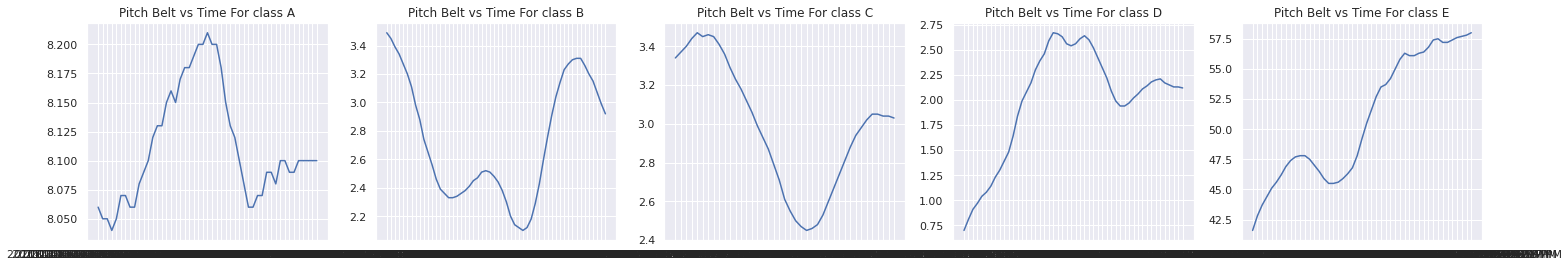

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows =[12, 250, 265, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

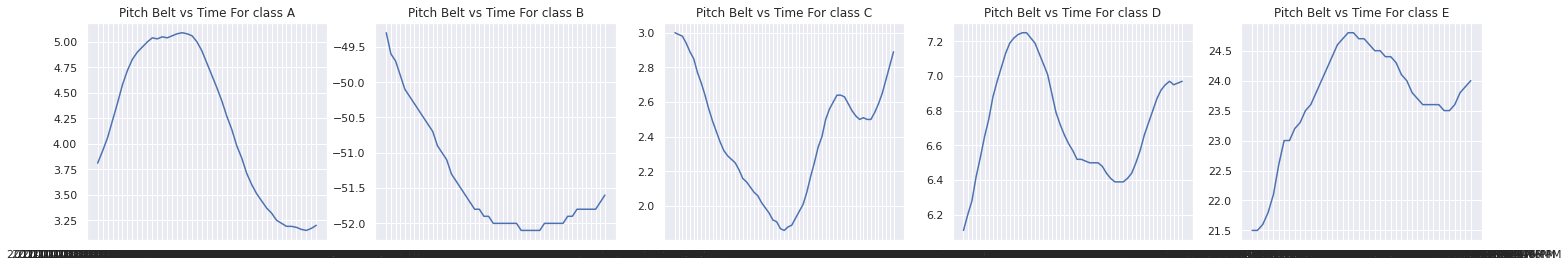

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [813, 535, 266, 394, 127]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

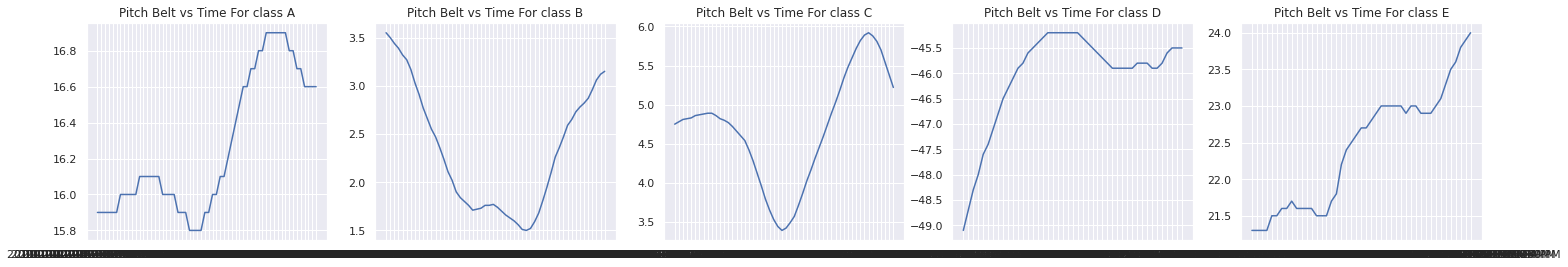

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows =  [684, 247, 465, 605, 129]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

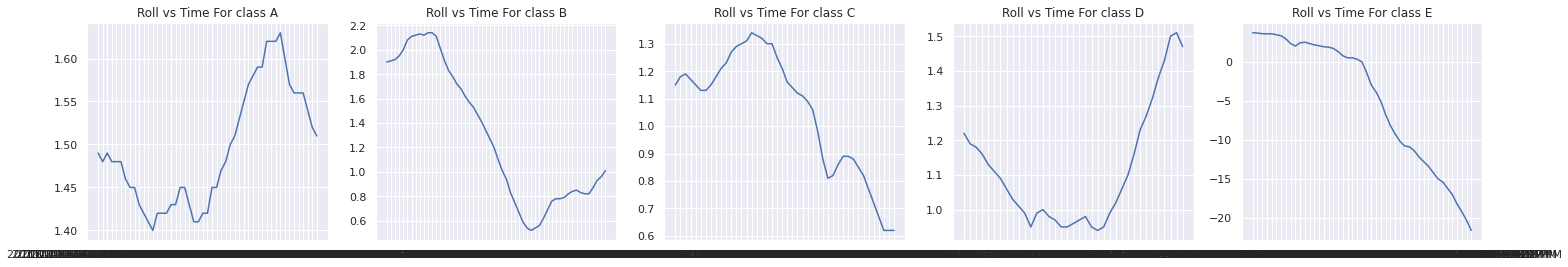

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 247, 466, 385, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

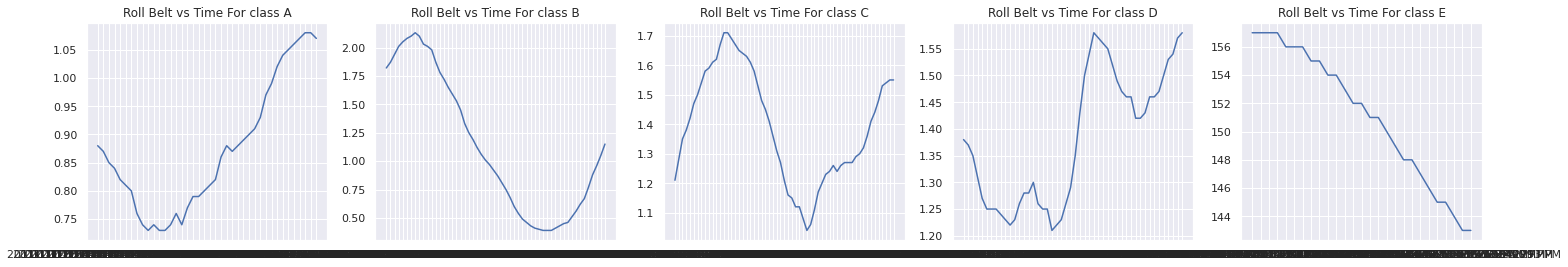

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [812, 250, 266, 387, 864]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

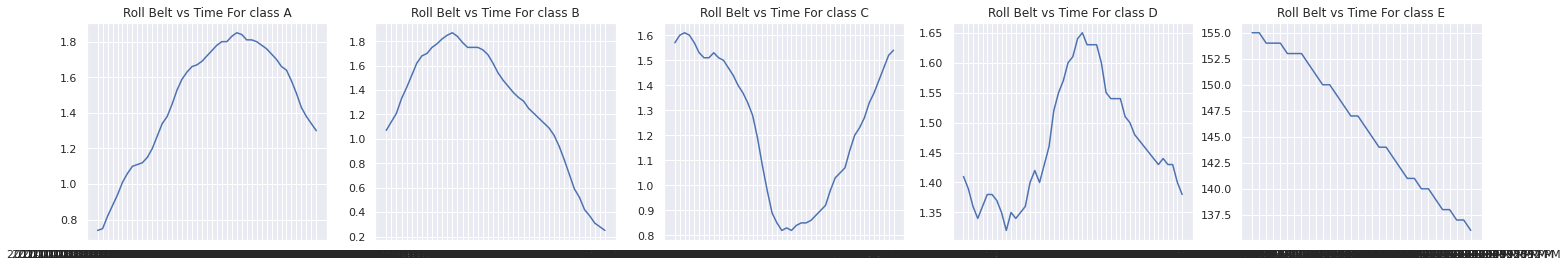

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [813, 248, 267, 386, 157]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['roll_belt'])
  s = "Roll Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

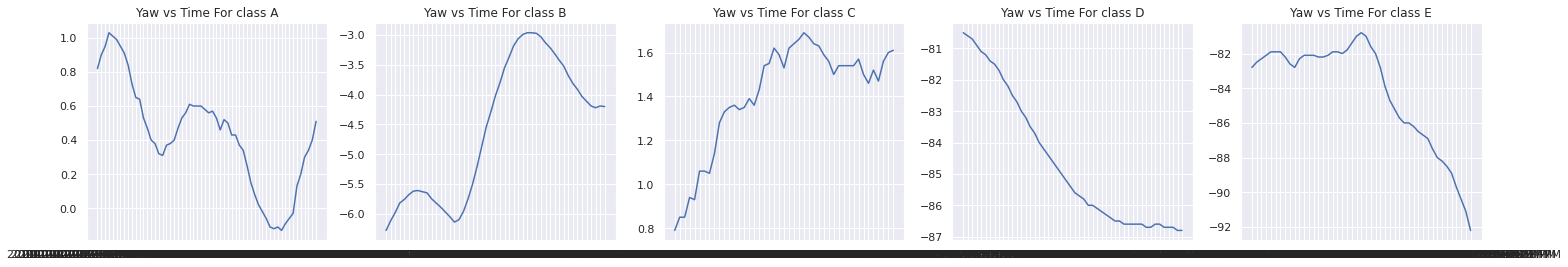

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [684, 80, 721, 294, 1]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

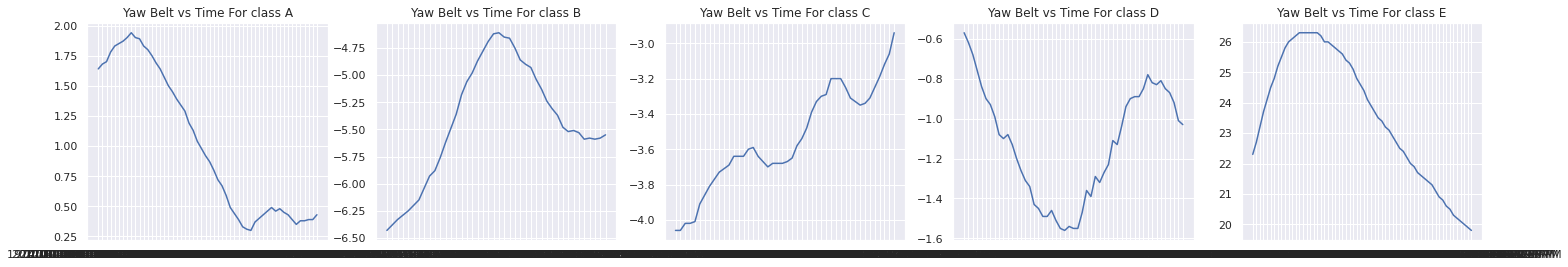

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [50, 688, 91, 739, 821]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

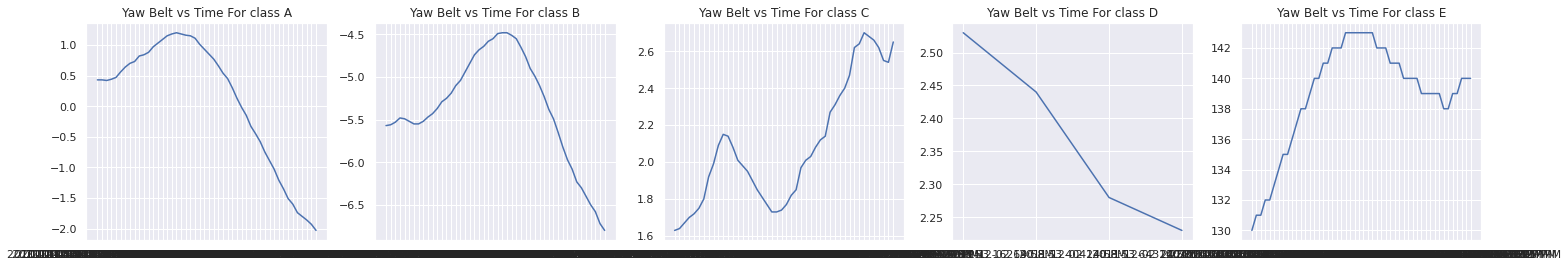

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [51, 689, 722, 144, 7]

fig = plt.subplots(figsize = (25, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['yaw_belt'])
  s = "Yaw Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()

In [ ]:
df1 = pd.read_csv('Preprocessed_Exercise.csv')

In [ ]:
def impute_classe(x):
  if x == 'A':
    return 5
  elif x =='B':
    return 4
  elif x=='C':
    return 3
  elif x=='D':
    return 2
  elif x=='E':
    return 1

In [ ]:
df1['classe'] = df1['classe'].apply(impute_classe)

In [ ]:
df1.classe.value_counts()

5    11159
4     7593
1     7214
3     6844
2     6432
Name: classe, dtype: int64

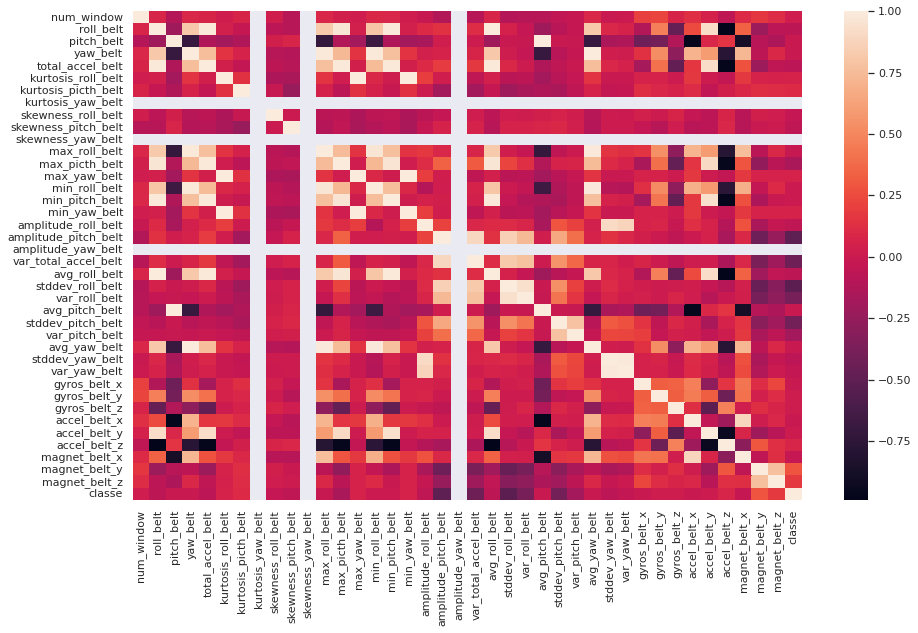

In [ ]:
#df1.columns[5:44]

sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[5:44])
lst.append('classe')
belt_corr = df1[lst].corr()
sns.heatmap(belt_corr)

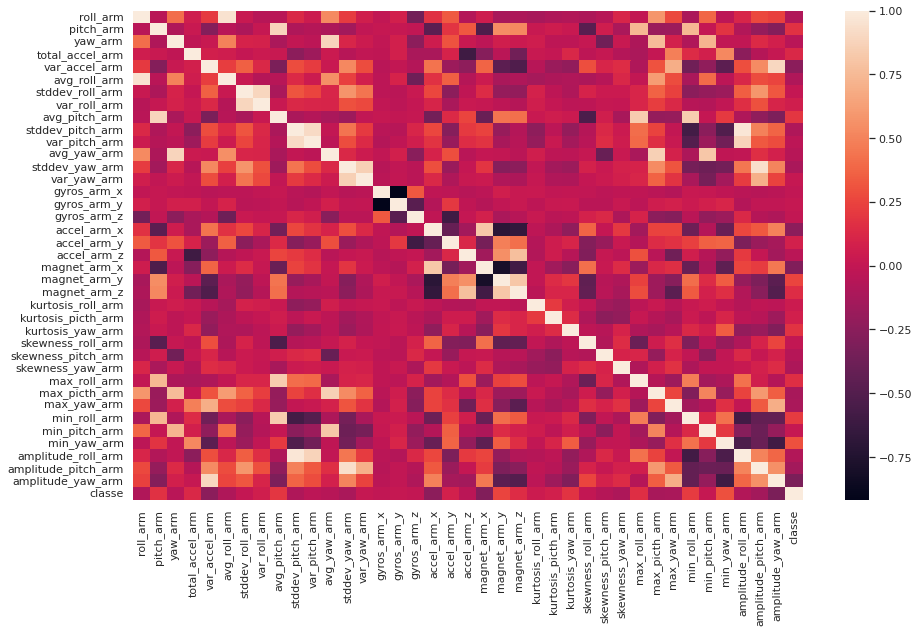

In [ ]:
#df1.columns[44:82]

sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[44:82])
lst.append('classe')
arm_corr = df1[lst].corr()
sns.heatmap(arm_corr)

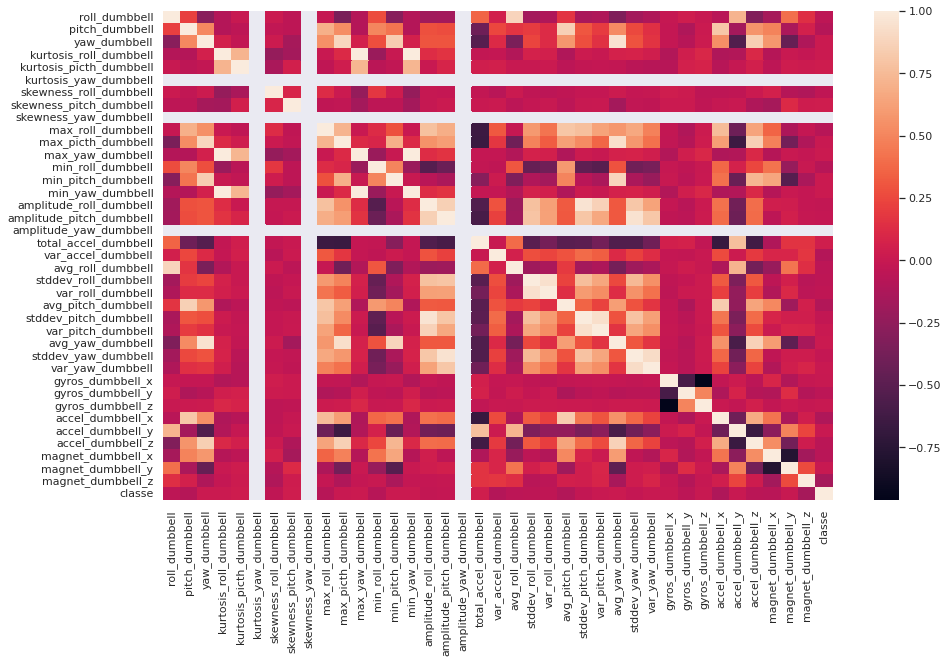

In [ ]:
#df1.columns[82:120]

sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[82:120])
lst.append('classe')
dumbell_corr = df1[lst].corr()
sns.heatmap(dumbell_corr)

In [ ]:
temp_df = df1[['roll_forearm', 'pitch_forearm', 'yaw_forearm', 'kurtosis_roll_forearm',
       'kurtosis_picth_forearm', 'kurtosis_yaw_forearm',
       'skewness_roll_forearm', 'skewness_pitch_forearm',
       'skewness_yaw_forearm', 'max_roll_forearm', 'max_picth_forearm',
       'max_yaw_forearm', 'min_roll_forearm', 'min_pitch_forearm',
       'min_yaw_forearm', 'amplitude_roll_forearm', 'amplitude_pitch_forearm',
       'amplitude_yaw_forearm', 'total_accel_forearm', 'var_accel_forearm',
       'avg_roll_forearm', 'stddev_roll_forearm', 'var_roll_forearm',
       'avg_pitch_forearm', 'stddev_pitch_forearm', 'var_pitch_forearm',
       'avg_yaw_forearm', 'stddev_yaw_forearm', 'var_yaw_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe']]

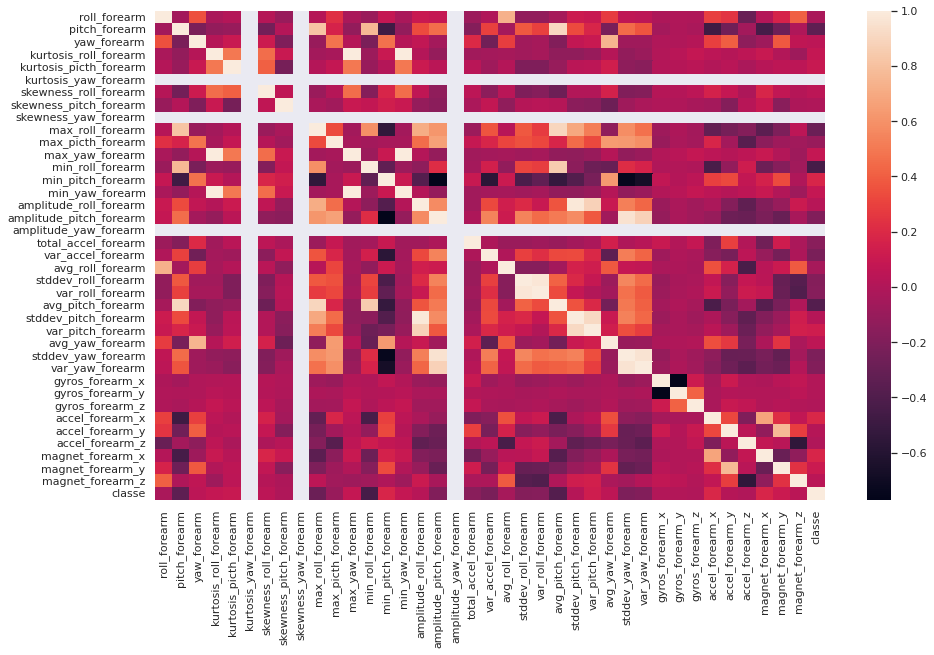

In [ ]:
#df1.columns[120:-2]

sns.set(rc={'figure.figsize':(15,9)})
lst = list(df1.columns[120:-2])
forearm_corr = df1[lst].corr()
sns.heatmap(forearm_corr)

In [ ]:
corr = [belt_corr, arm_corr, dumbell_corr, forearm_corr]
belt_corr[ ( (belt_corr['classe'] > 0.1) | (belt_corr['classe'] < -0.1)) ]['classe']

kurtosis_picth_belt     0.100927
max_picth_belt         -0.155445
amplitude_pitch_belt   -0.506568
var_total_accel_belt   -0.431917
stddev_roll_belt       -0.512700
var_roll_belt          -0.390259
stddev_pitch_belt      -0.400839
var_pitch_belt         -0.186049
magnet_belt_y           0.289960
magnet_belt_z           0.178129
classe                  1.000000
Name: classe, dtype: float64

In [ ]:
def get_corr(x):
  return x[ ( (x['classe'] > 0.1) | (x['classe'] < -0.1)) ]['classe']

In [ ]:
for i in range(len(corr)):
    print(get_corr(corr[i]))


kurtosis_picth_belt     0.100927
max_picth_belt         -0.155445
amplitude_pitch_belt   -0.506568
var_total_accel_belt   -0.431917
stddev_roll_belt       -0.512700
var_roll_belt          -0.390259
stddev_pitch_belt      -0.400839
var_pitch_belt         -0.186049
magnet_belt_y           0.289960
magnet_belt_z           0.178129
classe                  1.000000
Name: classe, dtype: float64
pitch_arm              0.172137
total_accel_arm        0.123944
var_accel_arm         -0.243992
avg_pitch_arm          0.196178
stddev_yaw_arm        -0.109566
accel_arm_x           -0.237829
magnet_arm_x          -0.290880
magnet_arm_y           0.253036
magnet_arm_z           0.152190
kurtosis_yaw_arm       0.179162
max_roll_arm           0.157622
max_picth_arm         -0.117668
max_yaw_arm           -0.116374
min_roll_arm           0.217113
min_yaw_arm            0.298766
amplitude_pitch_arm   -0.139755
amplitude_yaw_arm     -0.312804
classe                 1.000000
Name: classe, dtype: float64
avg

In [ ]:
# total = 0
# for i in range(len(corr)):
#     total += len(get_corr(corr[i]))
# total

50

In [ ]:
df2 = df1.copy()

In [ ]:
def get_corr_for_removing(x):  
  return x[ ( (x['classe'] < 0.1) & (x['classe'] > -0.1)) ]['classe']

In [ ]:
for i in range(len(corr)):    
    del_cols = list(get_corr_for_removing(corr[i]).index)
    df2.drop(del_cols, axis=1, inplace=True)

In [ ]:
df2.drop(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'new_window','Converted Time',
       'Converted Seconds'], axis=1, inplace=True)

,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_yaw_belt,max_picth_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,stddev_roll_belt,var_roll_belt,stddev_pitch_belt,...,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,var_pitch_forearm,stddev_yaw_forearm,var_yaw_forearm,accel_forearm_x,magnet_forearm_x,magnet_forearm_y,classe
0,3.572235,NaN,NaN,22.0,21.0,0.0,18.2000,8.2000,67.0000,5.2000,...,12.41064,154.02405,11.71574,111.93666,6.60173,43.58279,-170.0,-1160.0,1400.0,1
1,3.572235,NaN,NaN,22.0,21.0,0.0,18.2000,8.2000,67.0000,5.2000,...,12.41064,154.02405,11.71574,111.93666,6.60173,43.58279,-178.0,-1150.0,1410.0,1
2,3.572235,NaN,NaN,22.0,21.0,0.0,18.2000,8.2000,67.0000,5.2000,...,12.41064,154.02405,11.71574,111.93666,6.60173,43.58279,-182.0,-1130.0,1400.0,1
3,3.572235,NaN,NaN,22.0,21.0,0.0,18.2000,8.2000,67.0000,5.2000,...,12.41064,154.02405,11.71574,111.93666,6.60173,43.58279,-185.0,-1120.0,1400.0,1
4,3.572235,NaN,NaN,22.0,21.0,0.0,18.2000,8.2000,67.0000,5.2000,...,12.41064,154.02405,11.71574,111.93666,6.60173,43.58279,-188.0,-1100.0,1400.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39237,-1.063259,NaN,NaN,25.0,7.0,0.0,5.6268,4.7532,22.5926,1.3952,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-271.0,-151.0,-635.0,1
39238,-1.063259,NaN,NaN,25.0,7.0,0.0,5.6268,4.7532,22.5926,1.3952,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-263.0,-116.0,-654.0,1
39239,-1.063259,NaN,NaN,25.0,7.0,0.0,5.6268,4.7532,22.5926,1.3952,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-263.0,-98.0,-671.0,1
39240,-1.063259,NaN,NaN,25.0,7.0,0.0,5.6268,4.7532,22.5926,1.3952,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-270.0,-68.0,-678.0,1


In [ ]:
df2.columns
#this is not showing all the good correlations, find out the error

Index(['kurtosis_picth_belt', 'kurtosis_yaw_belt', 'skewness_yaw_belt',
       'max_picth_belt', 'amplitude_pitch_belt', 'amplitude_yaw_belt',
       'var_total_accel_belt', 'stddev_roll_belt', 'var_roll_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'magnet_belt_y', 'magnet_belt_z',
       'pitch_arm', 'total_accel_arm', 'var_accel_arm', 'avg_pitch_arm',
       'stddev_yaw_arm', 'accel_arm_x', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'kurtosis_yaw_arm', 'max_roll_arm', 'max_picth_arm',
       'max_yaw_arm', 'min_roll_arm', 'min_yaw_arm', 'amplitude_pitch_arm',
       'amplitude_yaw_arm', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell',
       'amplitude_yaw_dumbbell', 'avg_pitch_dumbbell', 'accel_dumbbell_x',
       'magnet_dumbbell_z', 'pitch_forearm', 'kurtosis_yaw_forearm',
       'skewness_yaw_forearm', 'max_roll_forearm', 'min_roll_forearm',
       'min_pitch_forearm', 'amplitude_pitch_forearm', 'amplitude_yaw_forearm',
       'total_accel_forearm', 'var_acce